# This is my first Data Analysis project using python. 

# Importing packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

# Reading data 

In [23]:
d1 = pd.read_csv("data/adult_data.csv")
d1.columns=["age","workclass","fnlwgt",'education',"education_num","marital_status",
                                          "occupation",'relationship','race','sex','capital_gain','capital_loss',
                                          'hours_per_week','native_country','earning_potential']
d1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earning_potential
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Removing missing values

In [3]:
print(d1.shape)
d1.dropna(inplace=True)
print(d1.shape)

(32560, 15)
(32560, 15)


# Removing outliers

In [4]:
def remove_outliers_iqr(d1, columns):
    for col in columns:
        Q1 = d1[col].quantile(0.25)
        Q3 = d1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        d1 = d1[(d1[col] >= lower_bound) & (d1[col] <= upper_bound)]
    return d1

# Specify the numerical columns where you want to remove outliers
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Remove outliers
d1_no_outliers = remove_outliers_iqr(d1, numerical_columns)

In [5]:
d1_no_outliers.head(9)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earning_potential
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
15,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K


# Results after removing outliers

In [6]:
d1 = d1_no_outliers
print(d1.shape)
d1.head()

(19004, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earning_potential
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


# Reseting index

In [7]:
d1.reset_index(inplace=True,drop=True)
d1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earning_potential
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


# Creating earning potentials with 1 if >50k else 0

In [8]:
d1.earning_potential.value_counts()

 <=50K    14982
 >50K      4022
Name: earning_potential, dtype: int64

In [9]:
def check(var):
    if var == " <=50K":
        return 0
    else:
        return 1
d1['earning_potentials'] = d1.earning_potential.apply(check)
d1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earning_potential,earning_potentials
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1


# The importance of the weekly working hours on earning potential(heg)

In [10]:
heg = d1.groupby('hours_per_week')['earning_potentials'].mean().reset_index()
heg.sort_values('earning_potentials',ascending=False).head()

,hours_per_week,earning_potentials
17,50,0.375525
12,45,0.319193
13,46,0.308824
19,52,0.299065
9,42,0.285714


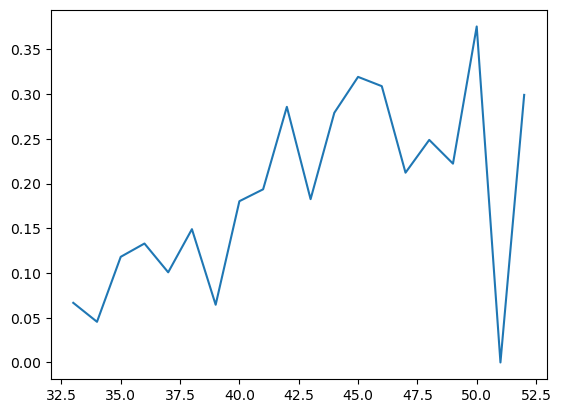

In [13]:
mp.plot(heg['hours_per_week'],heg['earning_potentials'])
mp.show()

* We can observe that there is a linear corelation between working hours and earning potential. That is the more you work, the higher you earn.

# The features that are highly correlated with the earning potential

In [14]:
relevant_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
corr_rel = d1[relevant_columns].corrwith(d1['earning_potentials'])
corr_rel.sort_values(ascending=False,inplace=True)
corr_rel

education_num     0.294839
age               0.245633
hours_per_week    0.172812
capital_gain           NaN
capital_loss           NaN
dtype: float64

# Find the relation between the number of years spent to get the degree and earning potential

de = degree_earning_potentials

In [15]:
de = d1.groupby('education_num')['earning_potentials'].mean().reset_index()
de.sort_values(by='earning_potentials',ascending=False).head()

,education_num,earning_potentials
11,16,0.701754
10,15,0.649289
9,14,0.493617
8,13,0.356676
7,12,0.232772


## Line plot 

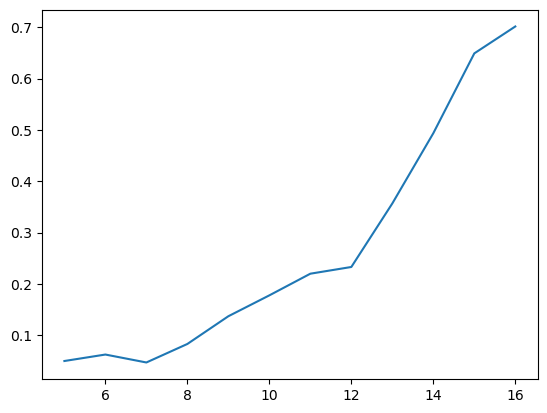

In [16]:
mp.plot(de['education_num'],de['earning_potentials'])
mp.show()

## Box plot

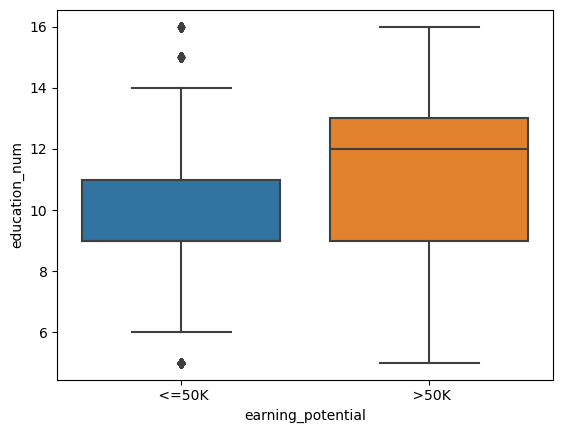

In [17]:
sb.boxplot(x='earning_potential', y='education_num', data=d1)
mp.show()

* The earning potential also depends on the level of the degree you earn and the number of years you spent on educations

# The relationship between age and earning potential

aeg = age_earning_grouped

In [18]:
aeg = d1.groupby('earning_potential')['age'].mean().reset_index()
aeg

,earning_potential,age
0,<=50K,36.518689
1,>50K,43.749876


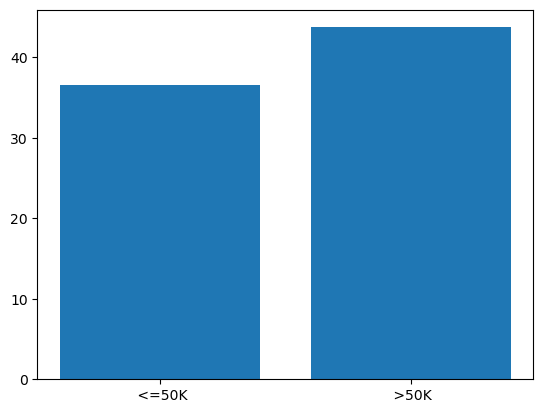

In [19]:
mp.bar(aeg['earning_potential'], aeg['age'])
mp.show()

* From the graph it is clear most people who earn more than 50k per month are above 40 years aged.

                    --------------------------The End------------------------